In [1]:
#import matplotlib
#matplotlib.get_backend()
#matplotlib.use('Qt4Agg')
#%matplotlib inline
#%config InlineBackend.print_figure_kwargs={'bbox_inches':None}
%matplotlib notebook

from matplotlib import pyplot
from matplotlib import rc

import numpy as np
from scipy.integrate import quad

np.seterr(all = 'ignore');
#Division by numbers (almost) zero 
;

''

In [2]:
#This is for latex initialisation. I don't have latex files and not willing to download redundant 1 GB data.
#rc('font', **{'family': 'sans-serif', 'sans-serif':['Helvetica']})
#rc('text', usetex = True)

In [3]:
h = 6.626e-34      #planck's constant
c = 3.0e+8         #light's speed
k = 1.38e-23       #Boltzmann constant
sol_rad = 6.957e+8 #Solar radius 
pars = 3.086e+16   #1 parsec

In [4]:
#This function takes in a list of wavelengths and a temperature and
# and generate a list of fluxes.
def generate_fluxes(wavelengths, temperature):
    lam = (h*c)/(k*temperature)
    cons = 2*(np.pi)*h*(c**2)
    fluxes = [cons/((wav**5)*((np.exp(lam/wav))-1)) for wav in wavelengths]
    return fluxes

#This function takes in a list of wavelengths, a temperature
#the radius and the distance of the star in question and 
#generates a list of fluxes
def generate_observed_fluxes(wavelength, temperature, rad, dis):
    fluxes = generate_fluxes(wavelength, temperature)
    obs_fluxes = [(flux)*(((sol_rad*rad)/(dis*pars))**2)  for flux in fluxes]
    return obs_fluxes

In [5]:
wavelengths = np.arange(1e-9, 3e-6, 1e-9)   #A list of wavelengths

temperatures = [5000, 6000, 7000, 8000]    #Temperatures for different curves

#Generates a list of lists(of fluxes) for the four temperatures
flux_list = [generate_fluxes(wavelengths, temp) for temp in temperatures]

In [6]:
cols = ['r-', 'g-', 'b-', 'k-']  #Different colors for plotting

<IPython.core.display.Javascript object>


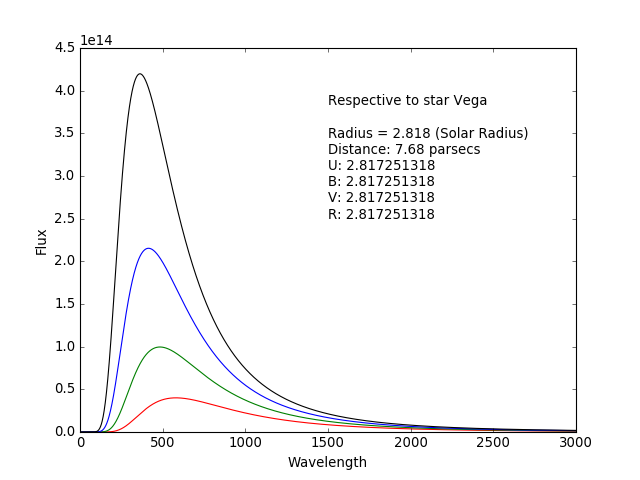

In [7]:
for i in range(4):
    
    pyplot.plot(wavelengths*1e9, flux_list[i], cols[i])

In [8]:
"""
def integrand(wavelength):
    obs_flux = generate_observed_flux(wavelength, 7000,1,2)
    return obs_flux
    
#return absolute value using integration, parameters: wavelengths only
def magnitude_abs(wavelength):
    return (-2.5)*(np.log10((quad(integrand, 507e-9, 595e-9))/(wavelength*(generate_observed_flux(wavelength, 7000, 2.26, 7.70)))))
""";


In [9]:
wavelength_centre_filter = [365e-9, 445e-9, 551e-9, 658e-9]  #Shamelessly copied from wikipedia without research
#These are the mid frequencies for U B V R filters.

In [10]:
#return approximated value using, parameters: wavelengths only
def magnitude_app(wavelength):
    print wavelength
    magnitudes = []
    for wave in wavelength:
        star = generate_observed_fluxes([wave], 7000., 1, 10)
        #print "Star: ", star
        vega = generate_observed_fluxes([wave], 7000., 2.818, 7.70)
        #print "Vega: ", vega
        m = (-2.5)*(np.log10(star[0]/vega[0]))
        magnitudes.append(m)
    #magnitudes = [ ((-2.5)*(np.log10((generate_observed_fluxes([wave], 7000, 1, 2)[0])/(generate_observed_fluxes([wave], 7000, 2.818, 7.70)[0])))) for wave in wavelength]
    return magnitudes

In [11]:
magnitudes = magnitude_app(wavelength_centre_filter)

[3.65e-07, 4.45e-07, 5.51e-07, 6.58e-07]


In [ ]:
pyplot.text(1500, 2.5e+14, "Respective to star Vega\n\n" + "Radius = 2.818 (Solar Radius) \nDistance: 7.68 parsecs" + "\n" + "U: " + str(magnitudes[0]) + '\n' + "B: "  + str(magnitudes[1]) + '\n' + "V: " + str(magnitudes[2]) + '\n'  + "R: " + str(magnitudes[3]));
#pyplot.ylabel(r'\textbf{Flux} (J/s.m^{2}.$\Delta$$\lambda\$.sr', fontsize = 16)
#pyplot.xlabel(r'\textbf{Wavelength}', fontsize = 16)
print ("The magnitudes for respective filters are: ")
print "U: ", magnitudes[0], "\nB: ", magnitudes[1], "\nV: ",  magnitudes[2], "\nR: ", magnitudes[3]

I want to note here that the output magnitudes for all four filters are equal because, I am calculating the flux ratio(F/F<sub>0</sub>) with same wavelength as a parameter to  both the fluxes, hence, this ratio is eventually ((R<sub>star</sub>/r<sub>star</sub>)*(r<sub>ref</sub>/R<sub>ref</sub>)).   
I tried searching for the proper system, but it was in vain. I could not find it, so I am hoping my mentor would tell me. 

In [13]:
pyplot.ylabel("Flux")
pyplot.xlabel("Wavelength");